# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [ ]:
#Import pandas
import pandas as pd
import numpy as np
from google.colab import files #Google colab because I could not figure out GitHub Desktop
uploaded = files.upload()

Saving airbnb_hw.csv to airbnb_hw (1).csv


dict_keys(['airbnb_hw (1).csv'])

In [ ]:
uploaded.keys()

dict_keys(['airbnb_hw (1).csv'])

In [ ]:
import pandas as pd
#Read the "airbnb" csv
airbnb=pd.read_csv('airbnb_hw.csv')
airbnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [ ]:
#Check for the column names
airbnb.columns

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')

In [ ]:
#Check the shape
airbnb.shape

(30478, 13)

In [ ]:
#Check for missing values
airbnb.isna().sum()

,0
Host Id,0
Host Since,3
Name,0
Neighbourhood,0
Property Type,3
Review Scores Rating (bin),8323
Room Type,0
Zipcode,134
Beds,85
Number of Records,0


In [ ]:
#This line of code removes any $ and then converts to numeric values
airbnb['Price_clean'] = pd.to_numeric(
    airbnb['Price'].replace('[\\$,]', '', regex=True),
    errors='coerce'
)

#This line of code counts all of the missing values
missing_prices=airbnb['Price_clean'].isna().sum()
print("Missing values in Price:", missing_prices)

Missing values in Price: 0


1. I cleaned the Price variable by removing dollar sign symbols and commas, then converting the values to numeric. This ensures that prices above $999 are correctly interpreted as numbers rather than strings. Any entries that could not be converted (blanks or text) were set to missing (NaN). After cleaning, the number of missing values in Price is 0.

In [ ]:
#For question #2
from google.colab import files #Google colab because I could not figure out GitHub Desktop
uploaded = files.upload()

Saving mn_police_use_of_force.csv to mn_police_use_of_force.csv


In [ ]:
#Read the CSV
mn_police=pd.read_csv('mn_police_use_of_force.csv')

In [ ]:
mn_police.columns

Index(['response_datetime', 'problem', 'is_911_call', 'primary_offense',
       'subject_injury', 'force_type', 'force_type_action', 'race', 'sex',
       'age', 'type_resistance', 'precinct', 'neighborhood'],
      dtype='object')

In [ ]:
#Shows all of the unique and how many are missing
mn_police['subject_injury'].value_counts(dropna=False)

,count
subject_injury,
NaN,9848
Yes,1631
No,1446


In [ ]:
#Any value not listed in the map becomes NaN and is stored in a new column
#'subject_injury_clean'
mn_police['subject_injury_clean']=mn_police['subject_injury'].map({
    'Yes':'Yes',
    'No':'No'
})

#Calculate the proportion of missing values in column + print
missing_prop=mn_police['subject_injury_clean'].isna().mean()
print ('Proportion missing values in column:',missing_prop)

Proportion missing values in column: 0.7619342359767892


In [ ]:
#Crosstabulation

cross_tab=pd.crosstab(
    mn_police['subject_injury_clean'],
    mn_police['force_type'],
    dropna=False
)

print(cross_tab)

force_type            Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury_clean                                                    
No                        0          1093                131        2   
Yes                       2          1286                 41        0   
NaN                       2          7051               1421        0   

force_type            Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury_clean                                                      
No                                   33                 34            0   
Yes                                  44                 40            0   
NaN                                  27                 74           87   

force_type            Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury_clean                                                        
No                                         1                            0   
Yes                        

2. I cleaned the 'subject_injury' variable by mapping all entries to 'Yes' if the person was injured and 'No' if not, keeping all of the missing entries NaN. The proportion of missing values is approximately 76% (which comes from the calculation we did earlier). 76% is definitely a concern because missingness is substantial and non-random. A cross-tabulation of 'subject_injury_clean' with 'force_type' shows that missing data occur disproportionately for common force types while rare or severe force types have fewer missing values. From this analysis, it can be implied that missing values might NOT be completely random and could be biased if not addressed properly.

In [ ]:
#For question #3
from google.colab import files #Google colab because I could not figure out GitHub Desktop
uploaded = files.upload()

Saving justice_data.parquet to justice_data (1).parquet


In [ ]:
#Read the file
justice=pd.read_parquet('justice_data.parquet')
#Check for unique values and missing values
justice['WhetherDefendantWasReleasedPretrial'].value_counts(dropna=False)

,count
WhetherDefendantWasReleasedPretrial,
1,19154
0,3801
9,31


In [ ]:
justice['WhetherDefendantWasReleasedPretrial'].unique()

array([9, 0, 1])

In [ ]:
#Map 'Yes' becomes 1 and 'No becoems' 0 and replace anything missing
justice['ReleasedPretrial_clean'] = justice['WhetherDefendantWasReleasedPretrial'].replace({
    1: 1,
    0: 0,
    9: np.nan
}).astype('float')  # ensures NaN is possible

# Check counts
justice['ReleasedPretrial_clean'].value_counts(dropna=False)


,count
ReleasedPretrial_clean,
1.0,19154
0.0,3801
NaN,31


In [ ]:
#Calculate the proportion missing after cleaning
missing_prop=justice['ReleasedPretrial_clean'].isna().mean()
print("Proportion missing values:", missing_prop)

Proportion missing values: 0.0013486470025232751


3. I cleaned the 'WhetherDefendantWasReleasedPretrial' variable by mapping 1 to indicate the defendant was released pretrial, 0 to indicate the defendant was not released, and 9 as placeholder for missing values to NaN. This created the numeric dummy variable 'ReleasedPretrial_clean' which was suitable for analysis. After cleaning, the proportion f missing values was approximately 0.135% (based of the calculation we made).

In [ ]:
justice['ImposedSentenceAllChargeInContactEvent'].value_counts(dropna=False)

,count
ImposedSentenceAllChargeInContactEvent,
,9053
0,4953
12,1404
.985626283367556,1051
6,809
...,...
11.9055441478439,1
35.0061601642711,1
46.6242299794661,1


In [ ]:
pd.crosstab(
    justice['ImposedSentenceAllChargeInContactEvent'].isna(),
    justice['SentenceTypeAllChargesAtConvictionInContactEvent']
)

SentenceTypeAllChargesAtConvictionInContactEvent,0,1,2,4,9
ImposedSentenceAllChargeInContactEvent,,,,,
False,8720,4299,914,8779,274


In [ ]:
justice['ImposedSentence_clean']=pd.to_numeric(
    justice['ImposedSentenceAllChargeInContactEvent'],
    errors='coerce' #anything that is invalid becomes NaN
)

missing_prop=justice['ImposedSentence_clean'].isna().mean()
print('Proportion missing:', missing_prop)

Proportion missing: 0.3938484294788132


4. I cleaned the 'ImposedSentenceAllChargeInContactEvent' variable by converting it to numeric and leaving the missing entries as NaN. Missing values typically occur when the defendant was not convicted as indicated by the 'SentenceTypeAllChargesAtConvinctionInContactEvent' variable. After cleaning, the proportion of missing values is 39% which is reasonable given that not all defendants recieved a sentence

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#It is an excel file so we will just have to use pd.read_excel
from google.colab import files
uploaded=files.upload() #upload the GSAF5 file here

Saving GSAF5.xls to GSAF5.xls


In [18]:
df = pd.read_excel('GSAF5.xls')
#I want to see the data frame
print(df.head())
print(df.info())
#Drop the empty rows
df = df.dropna(axis=1, how='all')

               Date    Year        Type      Country  \
0  16th August 2025  2025.0    Provoked          USA   
1       18th August  2025.0  Unprovoked    Australia   
2       17th August  2025.0  Unprovoked      Bahamas   
3        7th August  2025.0  Unprovoked    Australia   
4        1st August  2025.0  Unprovoked  Puerto Rico   

                               State                             Location  \
0                            Florida               Cayo Costa Boca Grande   
1                                NSW                       Cabarita Beach   
2  Atlantic Ocean near Big Grand Cay  North of Grand Bahama near Freeport   
3                                NSW                        Tathra Beach    
4                           Carolina                       Carolina Beach   

       Activity          Name Sex Age  ...                 Species   \
0       Fishing   Shawn Meuse   M   ?  ...  Lemon shark 1.8 m (6ft)   
1       Surfing     Brad Ross   M   ?  ...  5m (16.5ft) Gr

In [21]:
# 3. Clean the 'Year' Variable
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
print("Year summary:")
print(df['Year'].describe())
#Filter the attacks since 1940 and show that
df_post1940 = df[df['Year'] >= 1940]

Year summary:
count    7040.000000
mean     1935.621449
std       271.221061
min         0.000000
25%      1948.000000
50%      1986.000000
75%      2010.000000
max      2026.000000
Name: Year, dtype: float64


3. The 'Year' variable ranges from 0 to 2026, with a mean of 1935.6 and a standard deviation of 271.2. After filtering to include only attacks since 1940, the data show that shark attacks generally increase over time, although part of this trend may be due to imporved reporting and more people engaging in water activities over recent years.

/tmp/ipython-input-1248900290.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_post1940['Age'] = pd.to_numeric(df_post1940['Age'], errors='coerce')


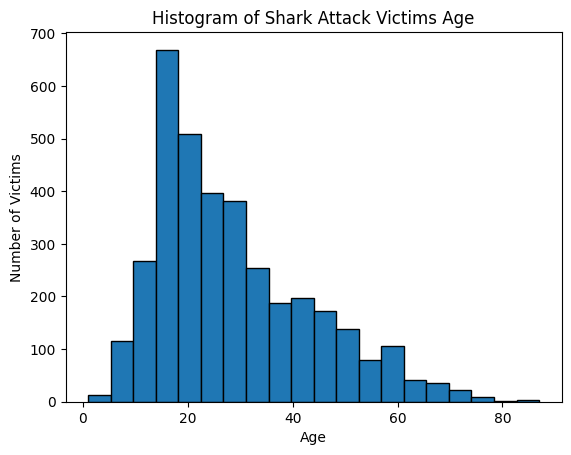

In [22]:
# 4. Clean the 'Age' Variable and make a histogram

df_post1940['Age'] = pd.to_numeric(df_post1940['Age'], errors='coerce')
plt.hist(df_post1940['Age'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.title('Histogram of Shark Attack Victims Age')
plt.show()

In [26]:
# 5. Calculate the proportion of victims that are male
# Ensure column names are clean
df_post1940.columns = df_post1940.columns.str.strip()

# Count male and female victims
male_count = df_post1940['Sex'].str.upper().value_counts().get('M', 0)
female_count = df_post1940['Sex'].str.upper().value_counts().get('F', 0)
total_known = male_count + female_count

# Proportion of male victims
proportion_male = male_count / total_known
print("Proportion of male victims:", proportion_male)

Proportion of male victims: 0.8577372696651476


5. The proportion of male victims is 85.77%

In [31]:
# 6.Clean the Type Variable
def clean_attack_type(x):
    if pd.isna(x):
        return 'Unknown'
    x = x.lower()
    if 'unprovoked' in x:
        return 'Unprovoked'
    elif 'provoked' in x:
        return 'Provoked'
    else:
        return 'Unknown'

df_post1940['Type_clean'] = df_post1940['Type'].apply(clean_attack_type)
print("Proportion of unprovoked attacks:", (df_post1940['Type_clean'] == 'Unprovoked').mean())

Proportion of unprovoked attacks: 0.7441438169602325


/tmp/ipython-input-389889844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_post1940['Type_clean'] = df_post1940['Type'].apply(clean_attack_type)


6. The proportion of unprovoked attacks is 74.41%

In [35]:
#Just to check column names
print (df_post1940.columns)
df_post1940.columns = df_post1940.columns.str.strip()

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22', 'Type_clean'],
      dtype='object')


/tmp/ipython-input-877399682.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_post1940['Fatal_clean'] = df_post1940['Fatal Y/N'].apply(clean_fatal)


In [36]:
# 7. Clean the Fatal Y/N Variable
def clean_fatal(x):
    if pd.isna(x):
        return 'Unknown'
    x = str(x).upper().strip()  # convert to string, uppercase, remove spaces
    if x in ['Y', 'N']:
        return x
    return 'Unknown'

df_post1940['Fatal_clean'] = df_post1940['Fatal Y/N'].apply(clean_fatal)

/tmp/ipython-input-3445792209.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_post1940['Fatal_clean'] = df_post1940['Fatal Y/N'].apply(clean_fatal)


In [38]:
# 8. Unprovoked attacks by gender

print("Fatality by attack type:")
print(pd.crosstab(df_post1940['Type_clean'], df_post1940['Fatal_clean'], normalize='index'))

print("Fatality by sex:")
print(pd.crosstab(df_post1940['Sex'].str.upper(), df_post1940['Fatal_clean'], normalize='index'))

Fatality by attack type:
Fatal_clean         N   Unknown         Y
Type_clean                               
Provoked     0.957692  0.017308  0.025000
Unknown      0.411699  0.449944  0.138358
Unprovoked   0.819180  0.012933  0.167887
Fatality by sex:
Fatal_clean         N   Unknown         Y
Sex                                      
 M           1.000000  0.000000  0.000000
F            0.793872  0.082173  0.123955
F            1.000000  0.000000  0.000000
LLI          1.000000  0.000000  0.000000
M            0.773389  0.074613  0.151998
M            0.666667  0.000000  0.333333
M X 2        0.000000  1.000000  0.000000


8. Sharks are morely likely to launch unrpovoked attacks on men than women. Sharks are far more likely to launch unprovoked attacks on men than on women, with men making up around 80% of victims, likely due to greater exposure through activities such as surfing, diving, and fishing. When comparing outcomes, attacks are more likely to be fatal when provoked, since these usually involve close contact with the shark, while unprovoked attacks are more common overall but less often deadly. Fatality rates are also slightly higher among men than women, though this mostly reflects the fact that men are more frequently victims of the attacks. Looking at species, about 17–20% of recorded attacks are attributed to white sharks, making them one of the most frequent species involved. For the most part, sharks tend to attack only when there is an incentive involve and I have heard that sharks (at the worst) will take a "bite" out of a human to figure out what it is and then immediately dislike the taste; hence, I would say I feel pretty neutral - swimming at the beach is a pretty optional choice so I would say it is an avoidable threat if you are truly concerned.

In [42]:
#Proportion of attacks by white sharks
df_post1940.columns = df_post1940.columns.str.strip() #strip the whitespace

#drop rows where species is missing
species_col = df_post1940['Species'].dropna()

species_split = species_col.str.split()  # each row becomes a list of words
all_species_words = species_split.sum()  # flatten to a single list of all words

all_species_series = pd.Series(all_species_words)
white_shark_count = all_species_series.str.contains('White', case=False).sum()
total_attacks = len(df_post1940)  # total number of attacks after 1940
proportion_white = white_shark_count / total_attacks

print("Number of words with 'White':", white_shark_count)
print("Total attacks:", total_attacks)
print("Proportion of attacks by white sharks:", proportion_white)

Number of words with 'White': 713
Total attacks: 5507
Proportion of attacks by white sharks: 0.12947158162338843


The proportion of attacks by white sharks is 12.94%